<a href="https://colab.research.google.com/github/MBrandao07/Analise_de_credito/blob/main/Projeto_An%C3%A1lise_de_Cr%C3%A9dito_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# removendo a limitação da visualização de colunas e linhas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Funções

In [3]:
def generate_metadata(dataframe):
    import pandas as pd
    """
    Gera um dataframe contendo metadados das colunas do dataframe fornecido.

    :param dataframe: DataFrame para o qual os metadados serão gerados.
    :return: DataFrame contendo metadados.
    """

    # Coleta de metadados básicos
    metadata = pd.DataFrame({
        'nome_variavel': dataframe.columns,
        'tipo': dataframe.dtypes,
        'qt_nulos': dataframe.isnull().sum(),
        'percent_nulos': round((dataframe.isnull().sum() / len(dataframe))* 100,2),
        'cardinalidade': dataframe.nunique(),
    })
    metadata=metadata.sort_values(by='percent_nulos',ascending=False)
    metadata = metadata.reset_index(drop=True)

    return metadata

# Análise Exploratória de Dados

In [4]:
# conectando ao drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
# lendo a base principal
df_application = pd.read_csv('/content/drive/MyDrive/2 - Projetos Portfolio/Analise de Credito/CONJUNTO DE DADOS/application_train.csv')
df_application.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50
0,247330,0,Cash loans,F,N,N,0,157500.0,706410.0,67072.5,679500.0,Unaccompanied,Commercial associate,Higher education,Married,House / apartment,0.032561,-14653,-2062,-8599.0,-2087,NaN,1,1,0,1,1,0,Private service staff,2.0,1,1,WEDNESDAY,13,0,0,0,0,0,0,Services,NaN,0.632424,0.220095,NaN,0.1050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1090,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.1050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0702,Panel,No,1.0,0.0,1.0,0.0,-1254.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,0.381340,0.253773,0.205728,0.808261,0.917700,0.487698,0.955921,0.089342,0.519432,0.667806,0.333320,0.873508,0.293837,0.758751,0.972640,0.813237,0.398762,0.060109,0.432021,0.711729,0.455977,0.532977,0.615955,0.005083,0.465449,0.145924,0.026534,0.562217,0.380997,0.634713,0.322195,0.677877,0.518137,0.284267,0.896499,0.260938,0.030923,0.052023,0.969193,0.984378,0.824762,0.333516,0.293260,0.564878,0.115058,0.655605,0.415562,0.092643,0.723331,0.796523
1,425716,1,Cash loans,F,Y,Y,1,121500.0,545040.0,25407.0,450000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.007114,-13995,-2246,-348.0,-172,12.0,1,1,1,1,1,0,Secretaries,3.0,2,2,MONDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.593456,0.695997,0.633032,0.6680,NaN,0.9856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6817,NaN,NaN,0.6807,NaN,0.9856,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7102,NaN,NaN,0.6745,NaN,0.9856,NaN

In [6]:
# verificando o tamanho do dataframe
df_application.shape

(215257, 172)

In [7]:
# gerando os metadados do df
df_metadata = generate_metadata (df_application)
df_metadata

,nome_variavel,tipo,qt_nulos,percent_nulos,cardinalidade
0,COMMONAREA_MODE,float64,150377,69.86,2904
1,COMMONAREA_MEDI,float64,150377,69.86,2966
2,COMMONAREA_AVG,float64,150377,69.86,2953
3,NONLIVINGAPARTMENTS_MODE,float64,149407,69.41,153
4,NONLIVINGAPARTMENTS_AVG,float64,149407,69.41,353
5,NONLIVINGAPARTMENTS_MEDI,float64,149407,69.41,193
6,FONDKAPREMONT_MODE,object,147183,68.38,4
7,LIVINGAPARTMENTS_AVG,float64,147079,68.33,1759
8,LIVINGAPARTMENTS_MODE,float64,147079,68.33,711
9,LIVINGAPARTMENTS_MEDI,float64,147079,68.33,1056


In [8]:
df_application.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50
count,215257.000000,215257.000000,215257.000000,2.152570e+05,2.152570e+05,215249.000000,2.150580e+05,215257.000000,215257.000000,215257.000000,215257.000000,215257.000000,73421.000000,215257.000000,215257.000000,215257.000000,215257.000000,215257.000000,215257.000000,215256.000000,215257.000000,215257.000000,215257.000000,215257.000000,215257.000000,215257.000000,215257.000000,215257.000000,215257.000000,94008.000000,2.147840e+05,172420.000000,105957.000000,89273.000000,110268.000000,72118.000000,64880.000000,100536.000000,106839.000000,108075.000000,69261.000000,87450.000000,68178.000000,107173.000000,65850.000000,96369.000000,105957.000000,89273.000000,110268.000000,72118.000000,64880.000000,100536.000000,106839.000000,108075.000000,69261.000000,87450.000000,68178.000000,107173.000000,65850.000000,96369.000000,105957.000000,89273.000000,110268.000000,72118.000000,64880.000000,100536.000000,106839.000000,108075.000000,69261.000000,87450.000000,68178.000000,107173.000000,65850.000000,96369.000000,111352.000000,214553.000000,214553.000000,214553.000000,214553.000000,215256.000000,215257.000000,215257.000000,215257.000000,215257.000000,215257.000000,215257.000000,215257.000000,215257.000000,215257.000000,215257.000000,215257.000000,215257.000000,215257.000000,215257.000000,215257.000000,215257.000000,215257.000000,215257.000000,215257.000000,215257.000000,186107.000000,186107.000000,186107.000000,186107.000000,186107.000000,186107.000000,215257.000000,215257.000000,215257.000000,215257.000000,215257.000000,215257.000000,215257.000000,215257.000000,2.152570e+05,215257.000000,215257.000000,2.152570e+05,215257.000000,2.152570e+05,215257.000000,215257.000000,215257.000000,2.152570e+05,2.152570e+05,2.152570e+05,2.15257

## **Conhecendo o público**

### Quantidade de pessoas por gênero

In [9]:
df_agrupado = df_application.groupby('CODE_GENDER')['TARGET'].agg(
    total_pessoas='count'
).reset_index()

# Calculando o total e a porcentagem
total_geral = df_agrupado['total_pessoas'].sum()
df_agrupado['Total com %'] = df_agrupado['total_pessoas'].apply(
    lambda x: f'{x} ({(x / total_geral * 100):.2f}%)'
)

# Exibindo só as colunas desejadas
df_agrupado = df_agrupado[['CODE_GENDER', 'Total com %']]
df_agrupado.columns = ['Gênero', 'Total de Pessoas']

print(df_agrupado)

  Gênero Total de Pessoas
0      F  141565 (65.77%)
1      M   73689 (34.23%)
2    XNA        3 (0.00%)


### Quantidade de pessoas por faixa de idade

In [10]:
df_application['AGE'] = (df_application['DAYS_BIRTH'] / -365).round(0)
df_application['AGE'] = df_application['AGE'].astype(int)
df_application['AGE'].head()

,AGE
0,40
1,38
2,59
3,36
4,54


In [11]:
print(f'O cliente mais velho tem {df_application["AGE"].max()} anos. \n')
print(f'O cliente mais velho tem {df_application["AGE"].min()} anos. \n')
print(f'A idade média é de {df_application["AGE"].mean():.0f} anos.')

O cliente mais velho tem 69 anos. 

O cliente mais velho tem 21 anos. 

A idade média é de 44 anos.


In [12]:
bins = [18, 25, 35, 45, 55, 65, 100]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '66+']

df_application['AGE_RANGE'] = pd.cut(df_application['AGE'], bins=bins, labels=labels, right=False)

df_agrupado = df_application.groupby('AGE_RANGE')['TARGET'].agg(
    total_pessoas='count'
).reset_index()

# Calculando o total e a porcentagem
total_geral = df_agrupado['total_pessoas'].sum()
df_agrupado['Total com %'] = df_agrupado['total_pessoas'].apply(
    lambda x: f'{x} ({(x / total_geral * 100):.2f}%)'
)

# Exibindo só as colunas desejadas
df_agrupado = df_agrupado[['AGE_RANGE', 'Total com %']]
df_agrupado.columns = ['Faixa de Idade', 'Total de Pessoas']

print(df_agrupado)

  Faixa de Idade Total de Pessoas
0          18-25     7119 (3.31%)
1          26-35   49350 (22.93%)
2          36-45   58935 (27.38%)
3          46-55   49061 (22.79%)
4          56-65   43283 (20.11%)
5            66+     7509 (3.49%)


### Quantidade de crianças

In [13]:
print(f'Quantidade máxima de crianças: {df_application["CNT_CHILDREN"].max()}')
print(f'Quantidade mínima de crianças: {df_application["CNT_CHILDREN"].min()}')
print(f'Quantidade média de crianças: {df_application["CNT_CHILDREN"].mean():.2f}')

Quantidade máxima de crianças: 19
Quantidade mínima de crianças: 0
Quantidade média de crianças: 0.42


In [14]:
df_agrupado = df_application.groupby('CNT_CHILDREN')['TARGET'].agg(
    total_pessoas='count'
).reset_index()

# Calculando o total e a porcentagem
total_geral = df_agrupado['total_pessoas'].sum()
df_agrupado['Total com %'] = df_agrupado['total_pessoas'].apply(
    lambda x: f'{x} ({(x / total_geral * 100):.2f}%)'
)

# Exibindo só as colunas desejadas
df_agrupado = df_agrupado[['CNT_CHILDREN', 'Total com %']]
df_agrupado.columns = ['Quantidade de crianças', 'Total de Pessoas']

print(df_agrupado)

    Quantidade de crianças Total de Pessoas
0                        0  150712 (70.01%)
1                        1   42855 (19.91%)
2                        2    18775 (8.72%)
3                        3     2546 (1.18%)
4                        4      287 (0.13%)
5                        5       54 (0.03%)
6                        6       14 (0.01%)
7                        7        5 (0.00%)
8                        8        1 (0.00%)
9                        9        2 (0.00%)
10                      10        2 (0.00%)
11                      11        1 (0.00%)
12                      14        2 (0.00%)
13                      19        1 (0.00%)


### Quantidade de membros na família

In [15]:
# Agrupando por quantidade de membros da família
df_agrupado = df_application.groupby('CNT_FAM_MEMBERS')['TARGET'].agg(
    total_pessoas='count'
).reset_index()

# Calculando o total e a porcentagem
total_geral = df_agrupado['total_pessoas'].sum()
df_agrupado['Total com %'] = df_agrupado['total_pessoas'].apply(
    lambda x: f'{x} ({(x / total_geral * 100):.2f}%)'
)

# Exibindo só as colunas desejadas
df_agrupado = df_agrupado[['CNT_FAM_MEMBERS', 'Total com %']]
df_agrupado.columns = ['Total de membros da familia', 'Total de Pessoas']

print(df_agrupado)

    Total de membros da familia Total de Pessoas
0                           1.0   47338 (21.99%)
1                           2.0  110958 (51.55%)
2                           3.0   36873 (17.13%)
3                           4.0    17346 (8.06%)
4                           5.0     2389 (1.11%)
5                           6.0      273 (0.13%)
6                           7.0       53 (0.02%)
7                           8.0       13 (0.01%)
8                           9.0        4 (0.00%)
9                          10.0        2 (0.00%)
10                         11.0        1 (0.00%)
11                         12.0        2 (0.00%)
12                         13.0        1 (0.00%)
13                         15.0        1 (0.00%)
14                         16.0        1 (0.00%)
15                         20.0        1 (0.00%)


### Estado civil

In [16]:
df_agrupado = df_application.groupby('NAME_FAMILY_STATUS')['TARGET'].agg(
    total_pessoas='count'
).reset_index()

# Calculando o total e a porcentagem
total_geral = df_agrupado['total_pessoas'].sum()
df_agrupado['Total com %'] = df_agrupado['total_pessoas'].apply(
    lambda x: f'{x} ({(x / total_geral * 100):.2f}%)'
)

# Exibindo só as colunas desejadas
df_agrupado = df_agrupado[['NAME_FAMILY_STATUS', 'Total com %']]
df_agrupado.columns = ['Estado civil', 'Total de Pessoas']

print(df_agrupado)

           Estado civil Total de Pessoas
0        Civil marriage    20780 (9.65%)
1               Married  137750 (63.99%)
2             Separated    13745 (6.39%)
3  Single / not married   31782 (14.76%)
4               Unknown        1 (0.00%)
5                 Widow    11199 (5.20%)


### Nível de formação escolar

In [17]:
df_agrupado = df_application.groupby('NAME_EDUCATION_TYPE')['TARGET'].agg(
    total_pessoas='count'
).reset_index()

# Calculando o total e a porcentagem
total_geral = df_agrupado['total_pessoas'].sum()
df_agrupado['Total com %'] = df_agrupado['total_pessoas'].apply(
    lambda x: f'{x} ({(x / total_geral * 100):.2f}%)'
)

# Exibindo só as colunas desejadas
df_agrupado = df_agrupado[['NAME_EDUCATION_TYPE', 'Total com %']]
df_agrupado.columns = ['Formação escolar', 'Total de Pessoas']

print(df_agrupado)

                Formação escolar Total de Pessoas
0                Academic degree      117 (0.05%)
1               Higher education   52664 (24.47%)
2              Incomplete higher     7169 (3.33%)
3                Lower secondary     2673 (1.24%)
4  Secondary / secondary special  152634 (70.91%)


### Ocupação

In [18]:
df_agrupado = df_application.groupby('OCCUPATION_TYPE')['TARGET'].agg(
    total_pessoas='count'
).reset_index()

# Calculando o total e a porcentagem
total_geral = df_agrupado['total_pessoas'].sum()
df_agrupado['Total com %'] = df_agrupado['total_pessoas'].apply(
    lambda x: f'{x} ({(x / total_geral * 100):.2f}%)'
)

# Exibindo só as colunas desejadas
df_agrupado = df_agrupado[['OCCUPATION_TYPE', 'Total com %']]
df_agrupado.columns = ['Tipo de ocupação', 'Total de Pessoas']

print(df_agrupado)

         Tipo de ocupação Total de Pessoas
0             Accountants     6861 (4.64%)
1          Cleaning staff     3272 (2.21%)
2           Cooking staff     4090 (2.77%)
3              Core staff   19317 (13.07%)
4                 Drivers    13030 (8.81%)
5                HR staff      398 (0.27%)
6   High skill tech staff     8055 (5.45%)
7                IT staff      360 (0.24%)
8                Laborers   38710 (26.18%)
9      Low-skill Laborers     1461 (0.99%)
10               Managers   14976 (10.13%)
11         Medicine staff     5983 (4.05%)
12  Private service staff     1862 (1.26%)
13          Realty agents      527 (0.36%)
14            Sales staff   22344 (15.11%)
15            Secretaries      929 (0.63%)
16         Security staff     4738 (3.20%)
17   Waiters/barmen staff      935 (0.63%)


### Tipo de contrato

In [19]:
df_agrupado = df_application.groupby('NAME_CONTRACT_TYPE')['TARGET'].agg(
    total_pessoas='count'
).reset_index()

# Calculando o total e a porcentagem
total_geral = df_agrupado['total_pessoas'].sum()
df_agrupado['Total com %'] = df_agrupado['total_pessoas'].apply(
    lambda x: f'{x} ({(x / total_geral * 100):.2f}%)'
)

# Exibindo só as colunas desejadas
df_agrupado = df_agrupado[['NAME_CONTRACT_TYPE', 'Total com %']]
df_agrupado.columns = ['Tipo de contrato', 'Total de Pessoas']

print(df_agrupado)

  Tipo de contrato Total de Pessoas
0       Cash loans  194663 (90.43%)
1  Revolving loans    20594 (9.57%)


### Valor do empréstimo

In [20]:
print(f'O valor do maior empréstimo é de {df_application["AMT_CREDIT"].max():.2f} \n')
print(f'O valor do menor empréstimo é de {df_application["AMT_CREDIT"].min():.2f} \n')
print(f'O valor médio de empréstimo é de {df_application["AMT_CREDIT"].mean():.2f}')

O valor do maior empréstimo é de 4050000.00 

O valor do menor empréstimo é de 45000.00 

O valor médio de empréstimo é de 599496.00


### Renda total

In [21]:
print(f'O valor da maior renda é de {df_application["AMT_INCOME_TOTAL"].max():.2f} \n')
print(f'O valor da menor renda é de {df_application["AMT_INCOME_TOTAL"].min():.2f} \n')
print(f'O valor médio da renda é de {df_application["AMT_INCOME_TOTAL"].mean():.2f}')

O valor da maior renda é de 13500000.00 

O valor da menor renda é de 25650.00 

O valor médio da renda é de 168556.85


### Renda média por membro da família

In [22]:
df_application['INCOME_PER_MEMBER'] = (df_application['AMT_INCOME_TOTAL'] / df_application['CNT_FAM_MEMBERS']).round(2)

In [23]:
print(f'O valor da maior renda por membro é de {df_application["INCOME_PER_MEMBER"].max():.2f} \n')
print(f'O valor da menor renda por membro é de {df_application["INCOME_PER_MEMBER"].min():.2f} \n')
print(f'O valor médio da renda por membro é de {df_application["INCOME_PER_MEMBER"].mean():.2f}')

O valor da maior renda por membro é de 6750000.00 

O valor da menor renda por membro é de 2812.50 

O valor médio da renda por membro é de 92988.72


## **Verificando a porcentagem de inadimplentes por grupos**

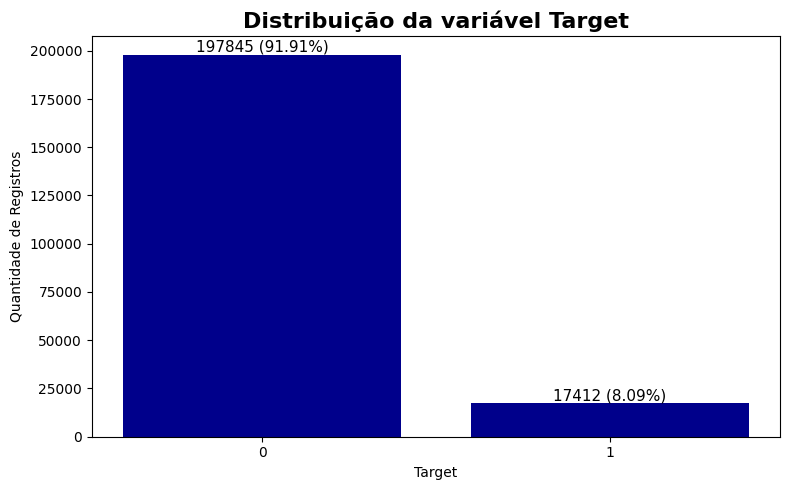

In [24]:
# verificando a distribuição do target
# Contando a quantidade de ocorrências de cada classe da target
target_counts = df_application['TARGET'].value_counts()
total = target_counts.sum()

# Criando o gráfico de barras
plt.figure(figsize=(8, 5))
bars = plt.bar(target_counts.index.astype(str), target_counts.values, color='darkblue')

# Adicionando os valores com porcentagem
for bar, count in zip(bars, target_counts.values):
    percent = (count / total) * 100
    label = f'{count} ({percent:.2f}%)'
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height(),
        label,
        ha='center',
        va='bottom',
        fontsize=11
    )

plt.xlabel('Target')
plt.ylabel('Quantidade de Registros')
plt.title('Distribuição da variável Target', fontsize=16, weight='bold')
plt.tight_layout()
plt.show()

### Faixa de idade

In [25]:
df_agrupado = df_application.groupby('AGE_RANGE')['TARGET'].agg(
    percentual_default=lambda x: x.mean() * 100,
    total_pessoas='count'
).reset_index()

# Arredondando o percentual
df_agrupado['percentual_default'] = df_agrupado['percentual_default'].round(2)

# Renomeando colunas para exibição
df_agrupado.columns = ['Faixa de Idade', '% Default', 'Total de Pessoas']

print(df_agrupado)

  Faixa de Idade  % Default  Total de Pessoas
0          18-25      12.60              7119
1          26-35      10.73             49350
2          36-45       8.51             58935
3          46-55       7.20             49061
4          56-65       5.43             43283
5            66+       4.35              7509


### Gênero

In [26]:
# Agrupando pelo gênero
df_agrupado = df_application.groupby('CODE_GENDER')['TARGET'].agg(
    percentual_default=lambda x: x.mean() * 100,
    total_pessoas='count'
).reset_index()

# Arredondando o percentual
df_agrupado['percentual_default'] = df_agrupado['percentual_default'].round(2)

# Renomeando colunas para exibição
df_agrupado.columns = ['Gênero', '% Default', 'Total de Pessoas']

df_agrupado = df_agrupado.sort_values(by='% Default', ascending=False)

print(df_agrupado)

  Gênero  % Default  Total de Pessoas
1      M      10.16             73689
0      F       7.01            141565
2    XNA       0.00                 3


### Ocupação

In [27]:
# Agrupando pela ocupação
df_agrupado = df_application.groupby('OCCUPATION_TYPE')['TARGET'].agg(
    percentual_default=lambda x: x.mean() * 100,
    total_pessoas='count'
).reset_index()

# Arredondando o percentual
df_agrupado['percentual_default'] = df_agrupado['percentual_default'].round(2)

# Renomeando colunas para exibição
df_agrupado.columns = ['Ocupação', '% Default', 'Total de Pessoas']

df_agrupado = df_agrupado.sort_values(by='% Default', ascending=False)

print(df_agrupado)

                 Ocupação  % Default  Total de Pessoas
9      Low-skill Laborers      17.11              1461
17   Waiters/barmen staff      11.23               935
4                 Drivers      11.11             13030
16         Security staff      10.68              4738
8                Laborers      10.66             38710
2           Cooking staff      10.56              4090
1          Cleaning staff      10.09              3272
14            Sales staff       9.65             22344
13          Realty agents       8.16               527
7                IT staff       7.50               360
12  Private service staff       6.77              1862
11         Medicine staff       6.60              5983
15            Secretaries       6.57               929
3              Core staff       6.43             19317
10               Managers       6.30             14976
6   High skill tech staff       6.05              8055
5                HR staff       5.78               398
0         

### Tipo de contrato

In [28]:
# Agrupando pelo tipo de contrato
df_agrupado = df_application.groupby('NAME_CONTRACT_TYPE')['TARGET'].agg(
    percentual_default=lambda x: x.mean() * 100,
    total_pessoas='count'
).reset_index()

# Arredondando o percentual
df_agrupado['percentual_default'] = df_agrupado['percentual_default'].round(2)

# Renomeando colunas para exibição
df_agrupado.columns = ['Tipo de contrato', '% Default', 'Total de Pessoas']

df_agrupado = df_agrupado.sort_values(by='% Default', ascending=False)

print(df_agrupado)

  Tipo de contrato  % Default  Total de Pessoas
0       Cash loans       8.37            194663
1  Revolving loans       5.44             20594


### Formação Escolar

In [29]:
# Agrupando pela formação educacional
df_agrupado = df_application.groupby('NAME_EDUCATION_TYPE')['TARGET'].agg(
    percentual_default=lambda x: x.mean() * 100,
    total_pessoas='count'
).reset_index()

# Arredondando o percentual
df_agrupado['percentual_default'] = df_agrupado['percentual_default'].round(2)

# Renomeando colunas para exibição
df_agrupado.columns = ['Nível de formação escolar', '% Default', 'Total de Pessoas']

df_agrupado = df_agrupado.sort_values(by='% Default', ascending=False)

print(df_agrupado)

       Nível de formação escolar  % Default  Total de Pessoas
3                Lower secondary      10.81              2673
4  Secondary / secondary special       8.95            152634
2              Incomplete higher       8.47              7169
1               Higher education       5.41             52664
0                Academic degree       2.56               117


### Imóvel próprio

In [30]:
# Agrupando por imóvel próprio
df_agrupado = df_application.groupby('FLAG_OWN_REALTY')['TARGET'].agg(
    percentual_default=lambda x: x.mean() * 100,
    total_pessoas='count'
).reset_index()

# Arredondando o percentual
df_agrupado['percentual_default'] = df_agrupado['percentual_default'].round(2)

# Renomeando colunas para exibição
df_agrupado.columns = ['Possui imóvel próprio', '% Default', 'Total de Pessoas']

df_agrupado = df_agrupado.sort_values(by='% Default', ascending=False)

print(df_agrupado)

  Possui imóvel próprio  % Default  Total de Pessoas
0                     N       8.37             65738
1                     Y       7.96            149519


### Carro próprio

In [31]:
# Agrupando por carro próprio
df_agrupado = df_application.groupby('FLAG_OWN_CAR')['TARGET'].agg(
    percentual_default=lambda x: x.mean() * 100,
    total_pessoas='count'
).reset_index()

# Arredondando o percentual
df_agrupado['percentual_default'] = df_agrupado['percentual_default'].round(2)

# Renomeando colunas para exibição
df_agrupado.columns = ['Possui carro próprio', '% Default', 'Total de Pessoas']

df_agrupado = df_agrupado.sort_values(by='% Default', ascending=False)

print(df_agrupado)

  Possui carro próprio  % Default  Total de Pessoas
0                    N       8.54            141832
1                    Y       7.22             73425


### Renda total

In [32]:
# Definindo os limites das faixas para que as faixas fiquem mais balanceadas
faixa_min = 12175.65
faixa_max = 1_373_085.00

# Quebrando em 9 faixas + 1 extra
bins = np.linspace(faixa_min, faixa_max, num=10).tolist()
bins.append(float('inf'))  # Última faixa aberta

# Criando labels personalizados
labels = []
for i in range(len(bins) - 1):
    valor_inferior = f"R$ {int(bins[i]):,}".replace(",", ".")
    if np.isinf(bins[i+1]):
        valor_superior = "∞"
    else:
        valor_superior = f"R$ {int(bins[i+1]):,}".replace(",", ".")
    labels.append(f"{valor_inferior} – {valor_superior}")

# Criando a coluna com faixas nomeadas
df_application['AMT_INCOME_TOTAL_RANGE'] = pd.cut(
    df_application['AMT_INCOME_TOTAL'],
    bins=bins,
    labels=labels,
    include_lowest=True
)

# Agrupando e calculando % e total
df_agrupado = df_application.groupby('AMT_INCOME_TOTAL_RANGE')['TARGET'].agg(
    percentual_default=lambda x: x.mean() * 100,
    total_pessoas='count'
).reset_index()

df_agrupado['percentual_default'] = df_agrupado['percentual_default'].round(2)
df_agrupado.columns = ['Faixa de renda total', '% Default', 'Total de Pessoas']

print(df_agrupado)

          Faixa de renda total  % Default  Total de Pessoas
0       R$ 12.175 – R$ 163.387       8.48            129436
1      R$ 163.387 – R$ 314.599       7.84             70267
2      R$ 314.599 – R$ 465.812       5.96             13332
3      R$ 465.812 – R$ 617.024       6.40              1078
4      R$ 617.024 – R$ 768.236       4.78               712
5      R$ 768.236 – R$ 919.448       5.68               229
6    R$ 919.448 – R$ 1.070.660       7.14                28
7  R$ 1.070.660 – R$ 1.221.872       1.47                68
8  R$ 1.221.872 – R$ 1.373.085      10.64                47
9             R$ 1.373.085 – ∞       5.00                60


### Tipo de renda

In [33]:
# Agrupando por tipo de renda
df_agrupado = df_application.groupby('NAME_INCOME_TYPE')['TARGET'].agg(
    percentual_default=lambda x: x.mean() * 100,
    total_pessoas='count'
).reset_index()

# Arredondando o percentual
df_agrupado['percentual_default'] = df_agrupado['percentual_default'].round(2)

# Renomeando colunas para exibição
df_agrupado.columns = ['Tipo de renda', '% Default', 'Total de Pessoas']

df_agrupado = df_agrupado.sort_values(by='% Default', ascending=False)

print(df_agrupado)

          Tipo de renda  % Default  Total de Pessoas
2       Maternity leave      50.00                 2
6            Unemployed      37.50                16
7               Working       9.57            111082
1  Commercial associate       7.59             50219
4         State servant       5.77             15207
3             Pensioner       5.40             38709
0           Businessman       0.00                 8
5               Student       0.00                14


### Quantidade de filhos

In [34]:
# Agrupando por quantidade de filhos
df_agrupado = df_application.groupby('CNT_CHILDREN')['TARGET'].agg(
    percentual_default=lambda x: x.mean() * 100,
    total_pessoas='count'
).reset_index()

# Arredondando o percentual
df_agrupado['percentual_default'] = df_agrupado['percentual_default'].round(2)

# Renomeando colunas para exibição
df_agrupado.columns = ['Quantidade de filhos', '% Default', 'Total de Pessoas']

df_agrupado = df_agrupado.sort_values(by='% Default', ascending=False)

print(df_agrupado)

    Quantidade de filhos  % Default  Total de Pessoas
11                    11     100.00                 1
9                      9     100.00                 2
6                      6      21.43                14
4                      4      12.20               287
3                      3       9.98              2546
1                      1       8.95             42855
2                      2       8.84             18775
0                      0       7.71            150712
5                      5       5.56                54
7                      7       0.00                 5
8                      8       0.00                 1
10                    10       0.00                 2
12                    14       0.00                 2
13                    19       0.00                 1


### Quantidade de membros da família

In [35]:
# Agrupando por quantidade de membros da família
df_agrupado = df_application.groupby('CNT_FAM_MEMBERS')['TARGET'].agg(
    percentual_default=lambda x: x.mean() * 100,
    total_pessoas='count'
).reset_index()

# Arredondando o percentual
df_agrupado['percentual_default'] = df_agrupado['percentual_default'].round(2)

# Renomeando colunas para exibição
df_agrupado.columns = ['Quantidade de membros da familia', '% Default', 'Total de Pessoas']

df_agrupado = df_agrupado.sort_values(by='% Default', ascending=False)

print(df_agrupado)

    Quantidade de membros da familia  % Default  Total de Pessoas
12                              13.0     100.00                 1
10                              11.0     100.00                 1
9                               10.0      50.00                 2
7                                8.0      23.08                13
5                                6.0      13.19               273
4                                5.0       9.75              2389
2                                3.0       8.87             36873
3                                4.0       8.71             17346
0                                1.0       8.40             47338
1                                2.0       7.55            110958
6                                7.0       3.77                53
8                                9.0       0.00                 4
11                              12.0       0.00                 2
13                              15.0       0.00                 1
14        

### Estado civil

In [36]:
# Agrupando por estado civil
df_agrupado = df_application.groupby('NAME_FAMILY_STATUS')['TARGET'].agg(
    percentual_default=lambda x: x.mean() * 100,
    total_pessoas='count'
).reset_index()

# Arredondando o percentual
df_agrupado['percentual_default'] = df_agrupado['percentual_default'].round(2)

# Renomeando colunas para exibição
df_agrupado.columns = ['Estado civil', '% Default', 'Total de Pessoas']

df_agrupado = df_agrupado.sort_values(by='% Default', ascending=False)

print(df_agrupado)

           Estado civil  % Default  Total de Pessoas
0        Civil marriage       9.92             20780
3  Single / not married       9.90             31782
2             Separated       8.18             13745
1               Married       7.58            137750
5                 Widow       5.63             11199
4               Unknown       0.00                 1


# **Insights**

## **Conhecendo o Perfil do Cliente**

### **Demografia e composição familiar**

- 66% dos clientes são mulheres — maioria significativa da base.

- A média de idade é de 44 anos, com a maior concentração entre 36 e 45 anos (27,4%).

- 70% dos clientes não possuem filhos, e a média é de apenas 0,42 filhos por cliente.

- Em relação à família, 51,6% dos clientes vivem em famílias com apenas 2 pessoas.

- 64% são casados, seguidos de 15% de solteiros.

### **Educação e ocupação**

- 71% possuem apenas o ensino médio, e apenas 24,4% têm ensino superior.

- O grupo ocupacional mais comum são trabalhadores braçais, representando 26% da base.

### **Renda e crédito**

- A renda mensal média é de R$ 168.556,85, mas com grande dispersão (mínimo de R$ 25.650 e máximo de R$ 13,5 milhões).

- O valor médio solicitado de empréstimo é de R$ 499.496,00.

- Em 90,4% dos casos, o contrato foi de empréstimo em dinheiro (cash loan), sendo o produto mais popular.

## **Análise de Inadimplência**

- A taxa geral de inadimplência é de 8,09%, mas certos grupos apresentam risco significativamente maior:

### **Grupos com maior inadimplência**

- Jovens de 18 a 25 anos: inadimplência de 12,6%, a maior entre as faixas etárias.

- Homens: apesar de serem apenas 34% da base, apresentam 10,16% de inadimplência (mulheres têm 7,01%).

- Trabalhadores de baixa qualificação: inadimplência de 17,11%, o maior índice entre ocupações.

- Pessoas com escolaridade inferior ao ensino médio: inadimplência de 10,8%.

- Clientes com 4 ou mais filhos: risco elevado, com destaque para casos extremos (filhos ≥ 6) com até 100% de inadimplência.

- Famílias grandes (≥ 8 membros): também apresentam inadimplência significativamente maior.

- Desempregados e pessoas em licença maternidade: inadimplência extremamente alta, com 37,5% e 50% respectivamente (apesar da amostra pequena).

- Clientes com renda entre R$ 1,22M e R$ 1,37M: 10,64% de inadimplência — faixa atípica com maior risco, embora represente poucos casos (47 indivíduos).

- Contratos de empréstimo em dinheiro (cash loans): inadimplência de 8,37%, superior a contratos rotativos (5,44%).

### **Grupos com menor inadimplência**

- Mulheres com imóvel e carro próprio: inadimplência abaixo de 7,5%.

- Clientes com ensino superior apresentam risco abaixo da média.

- Famílias com 1 a 2 membros têm inadimplência significativamente menor.

## **Recomendações Estratégicas**

### **1. Refinar a política de crédito**

- Aplicar critérios de aprovação mais rígidos para jovens (18-25 anos), desempregados e famílias grandes.

- Criar limites de crédito personalizados para clientes com muitos dependentes ou alta carga familiar.

### **2. Aprimorar a análise de risco**

Incluir variáveis como:

- Número de filhos e membros da família

- Tipo de ocupação

- Grau de escolaridade

- Rever limites e prazos para clientes que possuem apenas ensino fundamental ou estão em ocupações informais.

### **3. Ofertas segmentadas**

Criar produtos diferenciados para:

- Mulheres (perfil mais adimplente)

- Clientes com imóvel ou veículo próprio

- Pessoas de meia idade (36–55 anos), que apresentam menor risco

### **4. Educação financeira e acompanhamento**

- Implantar programas educativos voltados a jovens e autônomos com alto risco.

- Monitorar de perto grupos com renda alta e inadimplência elevada — pode haver perfis superendividados.

### **5. Atenção a exceções**

- Pequenos grupos como “licença maternidade” e “famílias com muitos filhos” têm poucas observações, mas riscos altíssimos. Podem indicar a necessidade de análise manual ou cautela extrema.